<a href="https://colab.research.google.com/github/AsraniSanjana/All_Codes/blob/main/TE_Group-07_SkinSpection_Docs/skinspection_finalmode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/check_aug28.csv')

In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
31748,43,33,47,112,93,112,153,134,152,164,...,133,113,139,99,77,106,47,29,50,6
31749,86,118,214,78,115,213,89,124,222,81,...,101,110,228,94,102,221,87,98,216,3
31750,109,109,179,117,116,184,134,125,188,149,...,140,126,184,142,128,186,134,122,182,0
31751,145,88,208,143,86,205,144,81,206,133,...,121,69,188,148,98,206,125,74,188,3
31752,143,128,189,144,121,194,155,136,198,125,...,144,143,160,171,161,177,169,157,175,1


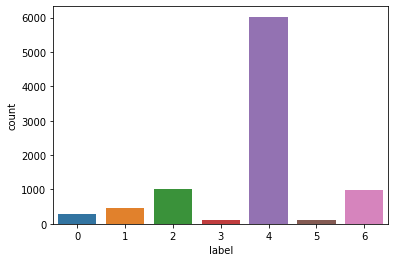

In [ ]:
import seaborn as sns

sns.countplot(df['label'])


In [ ]:
fractions=np.array([0.9,0.1])

df=df.sample(frac=1)
#print(df)
print(len(df)*0.8)
train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

25402.4


In [ ]:
print(len(train_set))

28577


In [ ]:
print(len(test_set))

3176


In [ ]:
df.label.unique()

array([2, 5, 4, 0, 3, 6, 1])

In [ ]:

classes={
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),

    1:('bcc' , 'basal cell carcinoma'),

    2:('bkl', 'benign keratosis-like lesions'),

    3:('df', 'dermatofibroma'),

    4:('nv', ' melanocytic nevi'),

    5:('vasc', ' pyogenic granulomas and hemorrhage'),

    6:('mel', 'melanoma'),
}

In [ ]:
y_train=train_set['label']

x_train=train_set.drop(columns=['label'])

y_test=test_set['label']

x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [ ]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


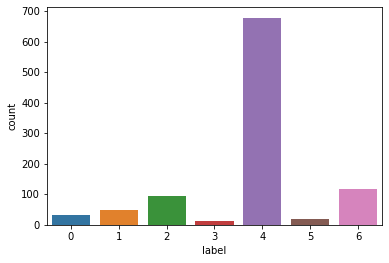

In [ ]:
sns.countplot(test_set['label'])

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

oversample = RandomOverSampler()

x_train,y_train  = oversample.fit_resample(x_train,y_train)

42189
42189


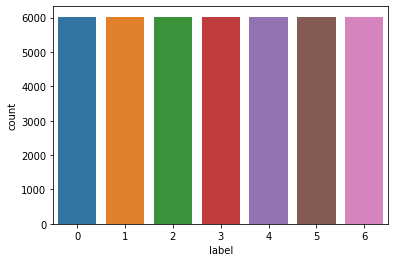

In [ ]:
sns.countplot(y_train)

print(len(y_train))
print(len(x_train))

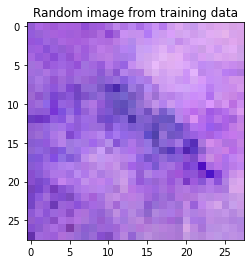

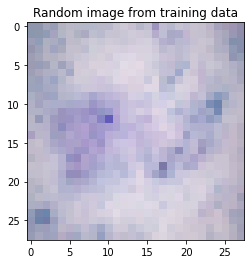

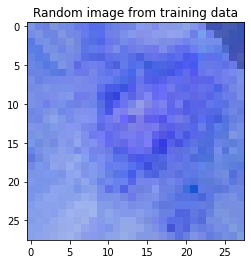

In [ ]:
import matplotlib.pyplot as plt
import random

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

In [ ]:
y_train.shape

(42231,)

In [ ]:
y_test.shape

(1002,)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [ ]:
%time

model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                          

# **Layer Stacking**

 The layers in a Sequential model are added one by one in a linear fashion. This means that the output of one layer is the input to the next layer.

In [ ]:
len(model.layers)

22

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/best_model4.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [ ]:
%time

optimizer=tf.keras.optimizers.Adam(lr=0.00001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [ ]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.1,
                    batch_size = 64,
                    epochs = 10,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/10
402/402 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9991

402/402 [==============================] - 49s 118ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 1.5346 - val_accuracy: 0.7530
Epoch 2/10
402/402 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9991

402/402 [==============================] - 45s 112ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 1.5341 - val_accuracy: 0.7516
Epoch 3/10
402/402 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9992

402/402 [==============================] - 45s 112ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 1.5375 - val_accuracy: 0.7540
Epoch 4/10
402/402 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9991

402/402 [==============================] - 47s 117ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 1.5397 - val_accuracy: 0.7530
Epoch 5/10
402/402 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 0.9990

402/402 [==============================] - 45s 113ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 1.5432 - val_accuracy: 0.7526
Epoch 6/10
402/402 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9993

402/402 [==============================] - 45s 113ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 1.5456 - val_accuracy: 0.7554
Epoch 7/10
402/402 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9993

402/402 [==============================] - 46s 114ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 1.5467 - val_accuracy: 0.7554
Epoch 8/10
402/402 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9992

402/402 [==============================] - 47s 118ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 1.5423 - val_accuracy: 0.7544
Epoch 9/10
402/402 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9992

402/402 [==============================] - 45s 113ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 1.5498 - val_accuracy: 0.7575
Epoch 10/10
402/402 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9992

402/402 [==============================] - 45s 113ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 1.5427 - val_accuracy: 0.7558
Duration: 0:08:24.234641


In [ ]:
model.save('/content/drive/MyDrive/final_model_to_use.h5')



In [ ]:

from keras.models import load_model
m = load_model('/content/drive/MyDrive/final_model.h5')

In [ ]:

x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)
#y_test = np.array(y_test, dtype=np.uint8).reshape(-1,28,28,3)

In [ ]:
y_test.shape

(3176,)

In [ ]:
Pred_Label.shape


(3176,)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
Pred = model.predict(x_test, batch_size=64)
Pred_Label = np.argmax(Pred, axis=1)
y_prob = Pred
ytrain = np.argmax(y_train, axis=-1)
test_acc = accuracy_score(y_test, Pred_Label)
ConfusionM = confusion_matrix(list(y_test), Pred_Label, labels=[0, 1, 2, 3, 4,5 ,6])
class_report = classification_report(list(y_test), Pred_Label, labels=[0, 1, 2, 3, 4, 5, 6], target_names=targetnames)

50/50 [==============================] - 2s 41ms/step


(3176,)
ROC AUC score: 0.8652770905495243


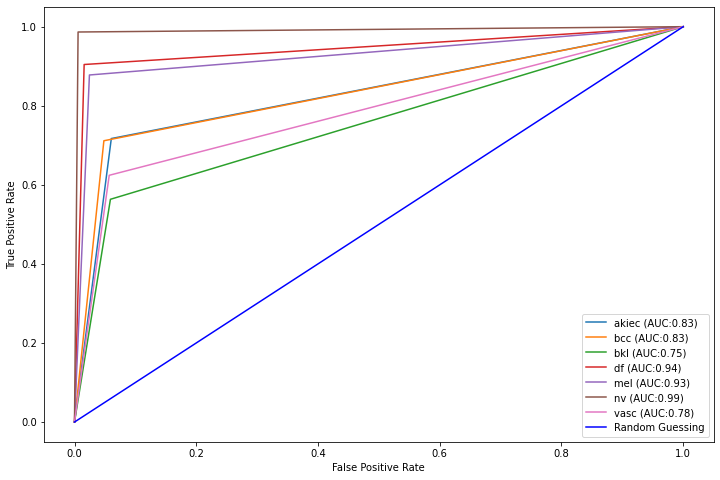

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    print(y_test.shape)
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)



print('ROC AUC score:', multiclass_roc_auc_score(y_test, Pred_Label))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()


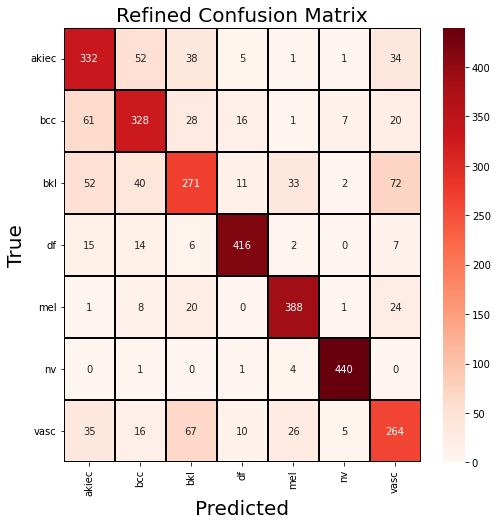

In [ ]:
import seaborn as sns
cm = ConfusionM
targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
class_names = targetnames
# Plot confusion matrix
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt=''); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

In [ ]:
print(class_report)

              precision    recall  f1-score   support

       akiec       0.67      0.72      0.69       463
         bcc       0.71      0.71      0.71       461
         bkl       0.63      0.56      0.59       481
          df       0.91      0.90      0.91       460
         mel       0.85      0.88      0.87       442
          nv       0.96      0.99      0.98       446
        vasc       0.63      0.62      0.63       423

    accuracy                           0.77      3176
   macro avg       0.77      0.77      0.77      3176
weighted avg       0.77      0.77      0.77      3176



In [ ]:
print("Precision: "+ str(precision_score(y_test, Pred_Label, average='weighted')))
print("Recall: "+ str(recall_score(y_test, Pred_Label, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_test, Pred_Label)))
print("weighted Roc score: " + str(roc_auc_score(y_test, y_prob,multi_class='ovr',average='weighted')))

Precision: 0.7657141002667291
Recall: 0.7679471032745592
Accuracy: 0.7679471032745592
weighted Roc score: 0.948173362733429


In [ ]:
print("Precision: "+ str(precision_score(y_test, Pred_Label, average='weighted')))
print("Recall: "+ str(recall_score(y_test, Pred_Label, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_test, Pred_Label)))
print("weighted Roc score: " + str(roc_auc_score(y_test, y_prob,multi_class='ovr',average='macro')))

Precision: 0.7657141002667291
Recall: 0.7679471032745592
Accuracy: 0.7679471032745592
weighted Roc score: 0.948537216456349


In [ ]:
print("Precision: "+ str(precision_score(y_test, Pred_Label, average='weighted')))
print("Recall: "+ str(recall_score(y_test, Pred_Label, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_test, Pred_Label)))
#print("weighted Roc score: " + str(roc_auc_score(y_test, y_prob,multi_class='ovr',average='micro')))


tpr={}
fpr={}
roc_auc={}
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print("Micro Roc score: " + str(roc_auc["micro"]))

Precision: 0.601287874544943
Recall: 0.6102015113350125
Accuracy: 0.6102015113350125


ValueError: ignored

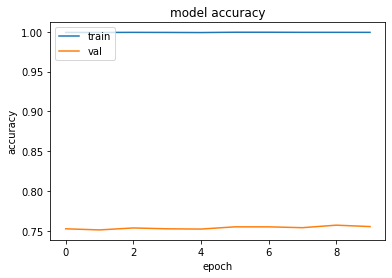

val 0.7575227618217468
min val 0.7515745162963867
acc 0.9993389844894409
mean val 0.7542687118053436


In [ ]:
#for aug 28
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])


plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

ValueError: ignored

In [ ]:
y_test.shape

(3176,)

In [ ]:
y_prob.shape

(3176, 7)

In [ ]:

from sklearn.metrics import roc_auc_score
fpr = {}
tpr = {}
roc_auc = {}
fpr["micro"], tpr["micro"], thresholds = roc_curve(y_test.ravel(), y_prob.ravel(), pos_label=1)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print("Micro Roc score: " + str(roc_auc["micro"]))

ValueError: ignored

In [ ]:
# Compute ROC curve and ROC area for each class

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr = {}
tpr = {}
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i], drop_intermediate=False, pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

KeyError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(

        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'

    )
test_batches =datagen.flow_from_directory(test_aug_path,
                                           target_size=(image_size,image_size),
                                           batch_size=batch_size,
                                           shuffle=False)

NameError: ignored

In [ ]:
predictions = model.predict(test_batches, steps=(test_set)/batch_size, verbose=0)


NameError: ignored

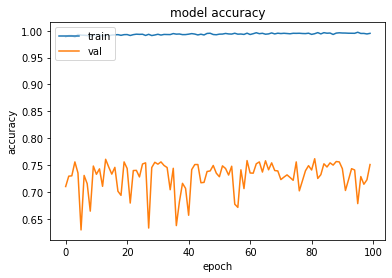

val 0.7617214918136597
min val 0.6291112899780273
acc 0.9972782731056213
mean val 0.7293946784734726


In [ ]:
#for aug 28
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.plot(history.history[])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

In [ ]:
test_batches =datagen.flow_from_directory(test_aug_path,
                                           target_size=(image_size,image_size),
                                           batch_size=batch_size,
                                           shuffle=False)

In [ ]:

#geting predictions on test dataset
y_pred = np.argmax(predictions, axis=1)
targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
#getting the true labels per image
y_true = test_batches.classes
#getting the predicted labels per image
y_prob=predictions
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_true)

# Creating classification report
report = classification_report(y_true, y_pred, target_names=targetnames)

from sklearn.metrics import confusion_matrix
print("\nClassification Report:")
print(report)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
#predictions = model.predict(test_batches, steps=len(test_df), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)
y_pred = np.argmax(predictions, axis=1)
y_true=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
#get labels
class_names = targetnames
# Plot confusion matrix
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt=''); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()


In [ ]:
print("Precision: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
print("weighted Roc score: " + str(roc_auc_score(y_true,y_prob,multi_class='ovr',average='weighted')))

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i], drop_intermediate=False)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:

plt.plot(fpr[0], tpr[0],'v-',label='akiec: ROC curve of (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1],'c',label='bcc: ROC curve of (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2],'b',label='bkl: ROC curve of (area = %0.2f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3],'g',label='df: ROC curve of (area = %0.2f)' % roc_auc[3])
plt.plot(fpr[4], tpr[4],'y',label='mel: ROC curve of (area = %0.2f)' % roc_auc[4])
plt.plot(fpr[5], tpr[5],'o-',label='nv: ROC curve of (area = %0.2f)' % roc_auc[5])
plt.plot(fpr[6], tpr[6],'r',label='vasc: ROC curve of (area = %0.2f)' % roc_auc[6])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of %s'%targetnames[i])
plt.legend(loc="lower right")
plt.show()

In [ ]:
x_test,y_test=next(test_batches)
sa_model = Model(model.inputs,model.output)
sa_features, sa_maps = sa_model.predict(x_test)
sa_maps.shape
img_idx = 0
t = (x_test + 1)/2 # bring the range between 0,1 from -1,1
plt.imshow(t[img_idx])
sum_attnmap = np.sum(sa_maps[img_idx],0)
sum_attnmap.shape
plt.imshow(t[img_idx],alpha=1.0)
plt.imshow(cv2.resize(sum_attnmap,(299,299),interpolation=cv2.INTER_CUBIC),cmap='jet',alpha=0.5)
plt.show()

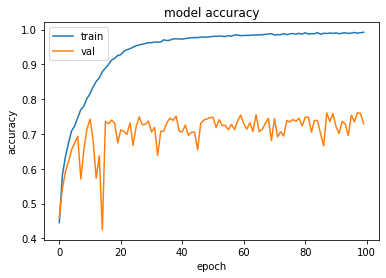

val 0.7610216736793518
min val 0.4244226813316345
acc 0.9924569129943848
mean val 0.7073792871832848


In [ ]:
#for aug 28
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

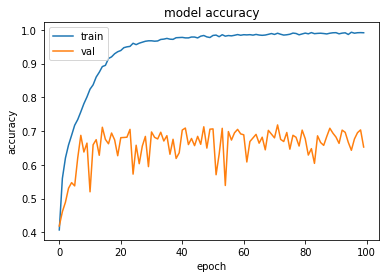

val 0.7183625102043152
min val 0.4188151955604553
acc 0.9930121302604675
mean val 0.6572859674692154


In [ ]:
#for aug 28
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

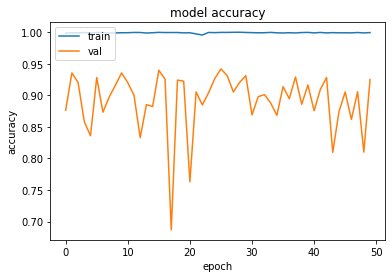

val 0.9417812824249268
min val 0.6868740916252136
acc 0.9998664855957031
mean val 0.8915476047992706


In [ ]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

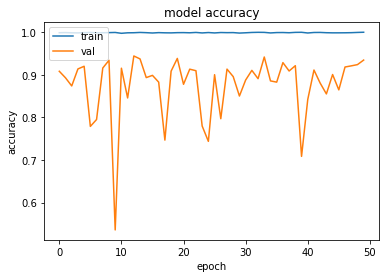

val 0.9441847801208496
min val 0.5358526110649109
acc 0.9998998641967773
mean val 0.8755668342113495


In [ ]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

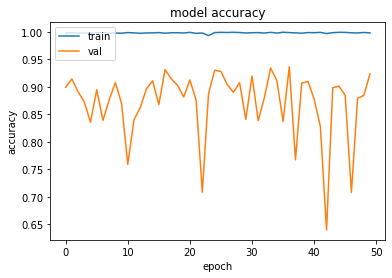

val 0.9367071986198425
min val 0.6397382616996765
acc 0.9994992613792419
mean val 0.8724956595897675


In [ ]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

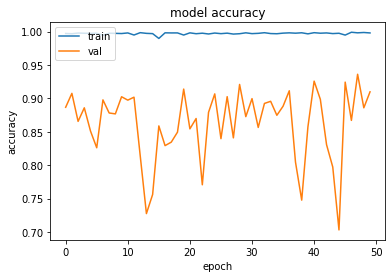

val 0.9361730813980103
min val 0.7031646370887756
acc 0.9990985989570618
mean val 0.8625797843933105


In [ ]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

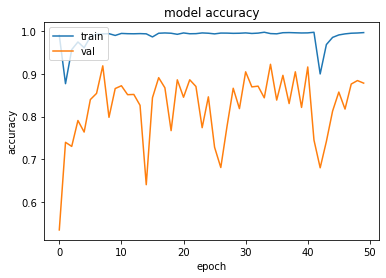

val 0.9225530624389648
min val 0.5338496565818787
acc 0.9977965950965881
mean val 0.8227213251590729


In [ ]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

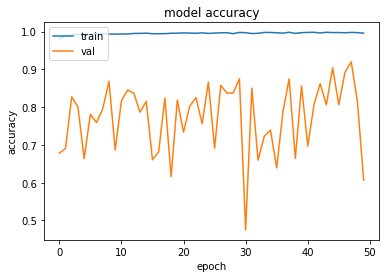

val 0.9197981953620911
min val 0.47497013211250305
acc 0.9980412721633911
mean val 0.7743062001466751


In [ ]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

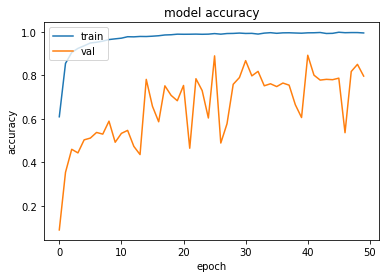

val 0.8917806148529053
min val 0.089895099401474
acc 0.9974105358123779
mean val 0.6570734322071076


In [ ]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

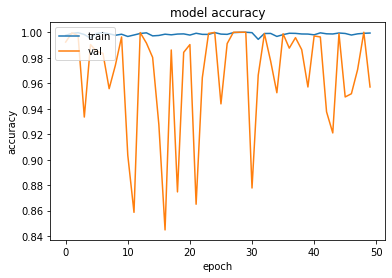

val 1.0
min val 0.8448687195777893
acc 1.0
mean val 0.9657942163944244


In [ ]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

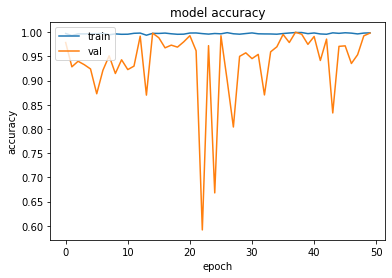

val 1.0
acc 0.9994032979011536
mean val 0.9382153260707855


In [ ]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

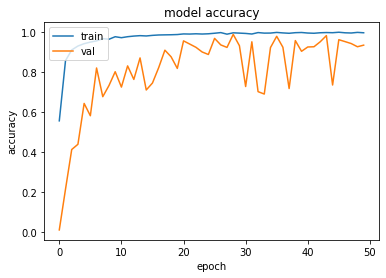

0.9867409467697144
0.9974475502967834


In [ ]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print(max(history.history['val_accuracy']))
print(max(history.history['accuracy']))


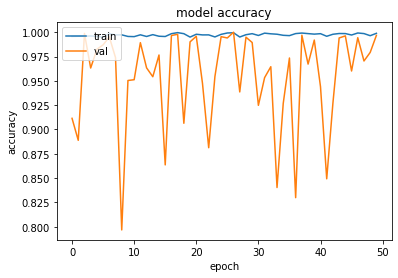

In [ ]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [ ]:
model.load_weights('/content/drive/MyDrive/best_model.h5')

In [ ]:
predictions = model.predict(test_batches, steps=(test_set)/batch_size, verbose=0)

In [ ]:
test_batches =datagen.flow_from_directory(test_aug_path,
                                           target_size=(image_size,image_size),
                                           batch_size=batch_size,
                                           shuffle=False)

In [ ]:

#geting predictions on test dataset
y_pred = np.argmax(predictions, axis=1)
targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
#getting the true labels per image
y_true = test_batches.classes
#getting the predicted labels per image
y_prob=predictions
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_true)

# Creating classification report
report = classification_report(y_true, y_pred, target_names=targetnames)

from sklearn.metrics import confusion_matrix
print("\nClassification Report:")
print(report)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
#predictions = model.predict(test_batches, steps=len(test_df), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)
y_pred = np.argmax(predictions, axis=1)
y_true=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
#get labels
class_names = targetnames
# Plot confusion matrix
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt=''); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()


In [ ]:
print("Precision: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
print("weighted Roc score: " + str(roc_auc_score(y_true,y_prob,multi_class='ovr',average='weighted')))

In [ ]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(7):
    r = roc_auc_score(y_test[:, i], y_prob[:, i])
    print("The ROC AUC score of "+targetnames[i]+" is: "+str(r))

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i], drop_intermediate=False)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:

plt.plot(fpr[0], tpr[0],'v-',label='akiec: ROC curve of (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1],'c',label='bcc: ROC curve of (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2],'b',label='bkl: ROC curve of (area = %0.2f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3],'g',label='df: ROC curve of (area = %0.2f)' % roc_auc[3])
plt.plot(fpr[4], tpr[4],'y',label='mel: ROC curve of (area = %0.2f)' % roc_auc[4])
plt.plot(fpr[5], tpr[5],'o-',label='nv: ROC curve of (area = %0.2f)' % roc_auc[5])
plt.plot(fpr[6], tpr[6],'r',label='vasc: ROC curve of (area = %0.2f)' % roc_auc[6])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of %s'%targetnames[i])
plt.legend(loc="lower right")
plt.show()

In [ ]:
x_test,y_test=next(test_batches)
sa_model = Model(model.inputs,model.output)
sa_features, sa_maps = sa_model.predict(x_test)
sa_maps.shape
img_idx = 0
t = (x_test + 1)/2 # bring the range between 0,1 from -1,1
plt.imshow(t[img_idx])
sum_attnmap = np.sum(sa_maps[img_idx],0)
sum_attnmap.shape
plt.imshow(t[img_idx],alpha=1.0)
plt.imshow(cv2.resize(sum_attnmap,(299,299),interpolation=cv2.INTER_CUBIC),cmap='jet',alpha=0.5)
plt.show()